# Algotytm przecinania się odcinków na płaszczyźnie

In [8]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [9]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

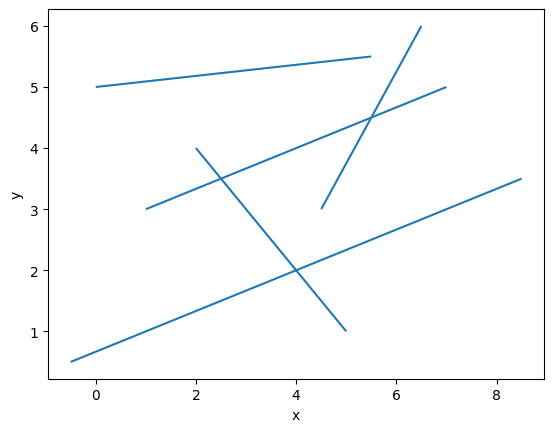

In [10]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

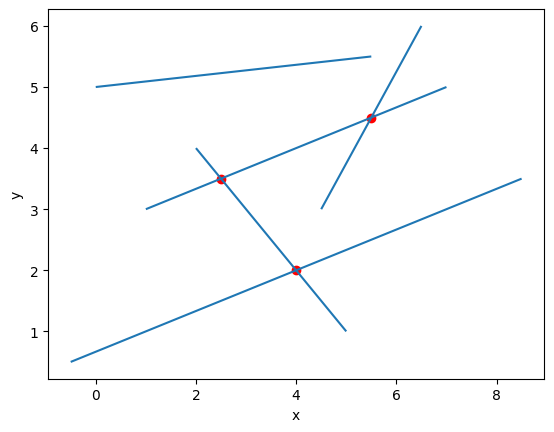

In [11]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [12]:
def generate_uniform_sections(max_x, max_y, n):
    lines = []
    for _ in range(n):
        line = []
        a = np.random.uniform(0, max_x)
        c = np.random.uniform(0, max_x)
        b = np.random.uniform(0, max_y)
        d = np.random.uniform(0, max_y)
        line.append((a, b))
        line.append((c, d))

        lines.append(line)

    return lines

In [13]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.062s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [14]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

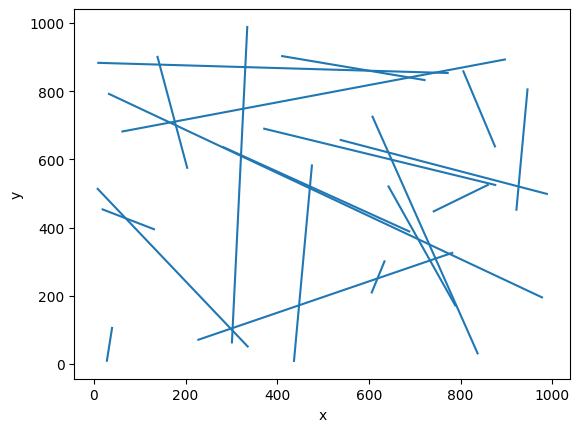

In [15]:
visualize = Visualizer()
for line in section:
    visualize.add_line_segment(line)
visualize.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [113]:
import matplotlib.pyplot as plt
%matplotlib tk

points = []

def add_sections(event):
    x, y = event.xdata, event.ydata
    
    if x is not None and y is not None:
        if event.button == 1:
            points.append((x, y))
            plt.plot(x, y, "go")
            if len(points) % 2 == 0 and len(points) > 0:
                plt.plot([points[-2][0], points[-1][0]], [points[-2][1], points[-1][1]], 'b-')
            
            plt.draw()
        elif event.button == 3:
            plt.close()


fig, ax = plt.subplots()
ax.set_title("Left click to add points, right click to close the plot")

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

fig.canvas.mpl_connect('button_press_event', add_sections)

plt.show()

In [114]:
lines = []
for i in range(0, len(points)-1, 2):
    x1, x2 = points[i][0], points[i+1][0]
    if x1 < x2:
        lines.append((points[i], points[i+1]))
    else:
        lines.append((points[i+1], points[i]))

vis = Visualizer()
for line in lines:
    vis.add_line_segment(line)

vis.show()

Uzupełnij funkcję ```is_intersection```

In [17]:
def ccw(a, b, c):
    det = (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

    if det > 0:
        return 1
    elif det < 0:
        return -1
    return 0

In [18]:
def intersect(line1, line2):
    a, b = line1
    c, d = line2

    return ccw(a, b, c) != ccw(a, b, d) and ccw(c, d, a) != ccw(c, d, b)

In [105]:
from queue import PriorityQueue
from sortedcontainers import SortedList, SortedSet


def is_intersection(sections):
    n = len(sections)
    q = PriorityQueue()
    active = SortedSet()
    
    for i in range(n):
        a, b = sections[i][0]
        c, d = sections[i][1]
        q.put(((a,b), 'start', i))
        q.put(((c,d), 'end', i))

    while not q.empty():
        point, eventType, i = q.get()

        if eventType == "start":
            active.add(i)
            index = active.index(i)

            if index > 0:
                line1 = sections[active[index-1]]
                line2 = sections[i]
                
                if intersect(line1, line2):
                    return True
                
            if index < len(active) - 1:
                line1 = sections[active[index]+1]
                line2 = sections[i]
                
                if intersect(line1, line2):
                    return True
                    
        elif eventType == "end":
            index = active.index(i)
            neighbours = []
            if index > 0 and index < len(active) - 1:
                neighbours = [active[index-1], active[index+1]]
            
            active.remove(i)
            
            if len(neighbours) == 2 and intersect(sections[neighbours[0]], sections[neighbours[1]]):
                return True
        
    return False

In [106]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Strukturę stanu zaimplementowałem, wykorzystując kolejkę priorytetową. Natomiast strukturę stanu, z użyciem SortedSet. Dzięki temu, złożoność tego algorytmu, to O(nlogn).

Uzupełnij funkcję ```is_intersection_with_visualization```

In [22]:

sections_one=[((0.11160925733331661,0.29566077245230327),(1.7254225819790243,1.790774778966961)),
              ((0.11449622213590283,1.6818869241507675),(1.7600661596100593,0.1993369008841321)),
              ((0.489801646472114,1.7782107957189388),(0.5966193441678048,0.09463704048394597)),
              ((0.12893104614883405,0.5008724988366682),(1.6041700602704023,0.6265123313168915)),
              ((0.35700126555314693,0.21190088413215444),(0.8968636836367738,1.6651349464867378)),
              ((0.21842695502900744,1.4180432759422985),(1.5464307642186776,1.4180432759422985)),
              ((0.7496284787048755,1.6609469520707303),(1.396308594484193,0.9615518845974872))]

sections_two=[((0.4551580688410791,0.1909609120521172),(1.6070570250729885,1.8703466728711027)),
              ((0.23574874384452493,1.7363308515588642),(1.7023268635583344,1.4557352256863656)),
              ((0.8622201060057388,1.949918566775244),(1.2577342839600536,1.7698348068869239)),
              ((0.29926196950142214,1.2965914378780825),(1.731196511584197,0.660016286644951)),
              ((0.06541782049193678,0.8777919962773383),(0.5042364704850452,0.9866798510935318)),
              ((0.18667034220055884,0.6474523033969287),(1.1740123046850528,0.26634481154025125)),
              ((1.0556467477790168,0.6432643089809212),(1.503126292179884,0.5218124709167054))]

sections_three=[((0.25884446226521485,0.18677291763610973),(1.719648652373852,0.22027687296416928)),
                ((0.32235768792211206,1.4054792926942763),(0.5821845201548737,0.4296765937645416)),
                ((0.755402408310048,0.358480688692415),(1.7889358076359216,1.0620637505816657)),
                ((0.12893104614883405,0.7437761749651),(0.3483403711453883,0.7395881805490925)),
                ((0.20110516621349006,1.6525709632387156),(0.9084115428471187,1.928978594695207)),
                ((0.6428107810091847,1.459923220102373),(1.84378813888506,1.2212075383899486)),
                ((1.1826731990928114,1.4515472312703581),(1.5550916586264363,1.8368427175430428)), 
                ((0.5157843296953901,1.6441949744067006),(0.9141854724522911,1.6400069799906931)),
                ((1.3905346648790207,0.5678804094927873),(1.8206924204643704,0.37104467194043733))]

sections_four=[((0.07985264450486795,1.1667636109818518),(0.7958199155462553,0.6223243369008841)),
               ((0.1664615885824552,0.48830851558864585),(0.7525154435074617,0.8359120521172637)),
               ((0.19533123660831753,0.8065960912052116),(0.21842695502900744,0.8526640297812936)), 
               ((0.3079228639091809,0.7898441135411819),(0.40319270239452676,0.7647161470451372)),
               ((0.18378337739797257,1.3594113541181942),(1.6157179194807474,0.3626686831084225)),
               ((0.8824288596238425,0.32078873894834803),(1.8322402796747153,0.7479641693811074)),
               ((0.9488290500833261,0.517624476500698),(1.0354379941609133,0.4841205211726384)),
               ((1.127820867843673,0.5427524429967426),(1.1826731990928114,0.5720684039087948)), 
               ((0.5359930833134938,1.422231270358306),(1.6186048842833336,1.0201838064215913)),
               ((0.6745673938376333,1.0871917170777103),(1.7398574059919556,1.3971033038622613)),
               ((0.7294197250867718,1.1625756165658443),(0.7813850915333241,1.196079571893904)),
               ((0.8622201060057388,1.2128315495579338),(0.9517160148859123,1.2212075383899486))]

sections_five=[((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)),
((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)),
((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)),
((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

sections_six=[
    ((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)),
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)),
((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)),
((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)),
((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))
]

In [23]:
def is_intersection_with_visualization(sections):
    n = len(sections)
    q = PriorityQueue()
    activeSections = SortedSet()
    vis = Visualizer()

    vis.add_line_segment(sections)
    vis.add_point([sections[i//2][i%2] for i in range(2*n)],color="blue")
    
    for i in range(n):
        a, b = sections[i][0]
        c, d = sections[i][1]
        q.put(((a,b), 'start', i))
        q.put(((c,d), 'end', i))

    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])
    
    while not q.empty():
        point, eventType, i = q.get()
        
        broomLine = vis.add_line(((point[0], min_y), (point[0], max_y)), color = "red")
        
        if eventType == "start":
            activeSections.add(i)
            index = activeSections.index(i)

            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[i],color="green")
            vis.add_point(sections[i][1],color="green",s=25)
            
            neighbours = []
            if index > 0:
                neighbours.append(activeSections[index-1])
            if index < len(activeSections) - 1:
                neighbours.append(activeSections[index+1])

            tempLines = []
            for neighbour in neighbours:
                line1 = sections[neighbour]
                line2 = sections[i]

                tempLines.append(vis.add_line_segment(line1, color="yellow"))
                tempLines.append(vis.add_line_segment(line2, color="yellow"))
                
                if intersect(line1, line2):
                    return True, vis

            for tempLine in tempLines:
                vis.remove_figure(tempLine)
                
        elif eventType == "end":
            index = activeSections.index(i)

            vis.add_point(point,color="black",s=25)
            vis.add_line_segment(sections[i],color="black")
            vis.add_point(sections[i][0],color="black",s=25)
            
            neighbours = []
            if index > 0 and index < len(activeSections) - 1:
                neighbours = [activeSections[index-1], activeSections[index+1]]
            
            activeSections.remove(i)

            tempLines = []
            if len(neighbours) == 2:
                line1 = sections[neighbours[0]]
                line2 = sections[neighbours[1]]

                tempLines.append(vis.add_line_segment(line1, color="yellow"))
                tempLines.append(vis.add_line_segment(line2, color="yellow"))
                
                if intersect(line1, line2):
                    return True, vis

            for temp_line in tempLines:
                vis.remove_figure(temp_line)
                
        vis.remove_figure(broomLine)
        
    return False, vis

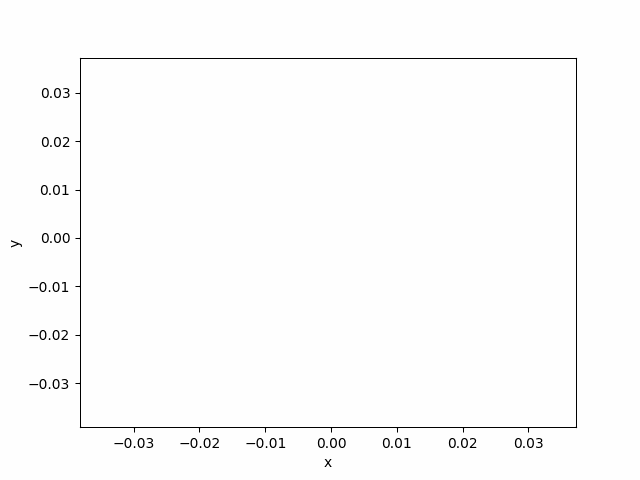

In [24]:
bool_value,vis=is_intersection_with_visualization(sections_six)
vis.show_gif(interval=200)

Uzupełnij funkcję ```find_intersections```

In [91]:
class Section:
    sweepX = -float('inf')
    
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.a = (y1 - y2) / (x1 - x2)
        self.b = y1 - self.a * x1
        
    def __gt__(self, other):
        return self.a * Section.sweepX + self.b > other.a * Section.sweepX + other.b
    
    def __eq__(self, other):
        return self.x1 == other.x1 and self.y1 == other.y1 and self.x2 == other.x2 and self.y2 == other.y2
        
    def __hash__(self):
        return hash((self.x1, self.y1, self.x2, self.y2))

In [34]:
def instersectsObject(section1, section2):
    a, b = (section1.x1, section1.y1), (section1.x2, section1.y2)
    c, d = (section2.x1, section2.y1), (section2.x2, section2.y2)

    return ccw(a, b, c) != ccw(a, b, d) and ccw(c, d, a) != ccw(c, d, b)

In [25]:
def calculateIntersectingPoint(line1, line2):
    x1, y1, x2, y2 = line1.x1, line1.y1, line1.x2, line1.y2
    x3, y3, x4, y4 = line2.x1, line2.y1, line2.x2, line2.y2

    a1 = line1.a
    b1 = line1.b

    a2 = line2.a    
    b2 = line2.b

    if a1 == a2:
        return None
        
    x = (b2 - b1) / (a1 - a2)

    if max(x1, x3) < x < min(x2, x4):
        y = a2 * x + b2
        return (x,y)
        
    return None

In [72]:
def add_intersection_event(p, index1, index2, events, processed_intersections):
    if p not in processed_intersections:
        processed_intersections.add(p)
        events.put((p, 'cross', index1, index2))

In [73]:
def find_intersections(sections):
    events = PriorityQueue()
    sectionObjects = []

    for i, ((x1, y1), (x2, y2)) in enumerate(sections):
        section = Section(x1, y1, x2, y2)
        sectionObjects.append(section)
        events.put(((section.x1, section.y1), 'start', i))
        events.put(((section.x2, section.y2), 'end', i))

    active = SortedList()
    intersections = SortedSet()
    processed_intersections = set()

    while not events.empty():
        event = events.get()
        point, event_type = event[:2]

        if event_type == 'start':
            index = event[2]
            Section.sweepX = point[0]
            active.add((sectionObjects[index], index))
            idx = active.index((sectionObjects[index], index))

            if idx > 0:
                neighbor = active[idx - 1][1]
                if instersectsObject(sectionObjects[neighbor], sectionObjects[index]):
                    p = calculateIntersectingPoint(sectionObjects[neighbor], sectionObjects[index])
                    if p:
                        add_intersection_event(p, neighbor, index, events, processed_intersections)
            if idx < len(active) - 1:
                neighbor = active[idx + 1][1]
                if instersectsObject(sectionObjects[neighbor], sectionObjects[index]):
                    p = calculateIntersectingPoint(sectionObjects[neighbor], sectionObjects[index])
                    if p:
                        add_intersection_event(p, index, neighbor, events, processed_intersections)

        elif event_type == 'end':
            index = event[2]
            idx = active.index((sectionObjects[index], index))
            Section.sweepX = point[0]

            neighbors = []
            if idx > 0:
                neighbors.append(active[idx - 1][1])
            if idx < len(active) - 1:
                neighbors.append(active[idx + 1][1])

            active.pop(idx)

            if len(neighbors) == 2:
                if instersectsObject(sectionObjects[neighbors[0]], sectionObjects[neighbors[1]]):
                    p = calculateIntersectingPoint(sectionObjects[neighbors[0]], sectionObjects[neighbors[1]])
                    if p:
                        add_intersection_event(p, neighbors[0], neighbors[1], events, processed_intersections)

        elif event_type == 'cross':
            index1, index2 = event[2], event[3]
            intersections.add((min(index1, index2), max(index1, index2)))

            idx1 = active.index((sectionObjects[index1], index1))
            idx2 = active.index((sectionObjects[index2], index2))

            if idx1 > 0:
                neighbor = active[idx1 - 1][1]
                first, second = min(index2, neighbor), max(index2, neighbor)
                if instersectsObject(sectionObjects[first], sectionObjects[second]):
                    p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                    if p:
                        add_intersection_event(p, first, second, events, processed_intersections)
            if idx1 < len(active) - 1:
                neighbor = active[idx1 + 1][1]
                first, second = min(index2, neighbor), max(index2, neighbor)
                if instersectsObject(sectionObjects[first], sectionObjects[second]):
                    p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                    if p:
                        add_intersection_event(p, first, second, events, processed_intersections)
            if idx2 > 0:
                neighbor = active[idx2 - 1][1]
                first, second = min(index1, neighbor), max(index1, neighbor)
                if instersectsObject(sectionObjects[first], sectionObjects[second]):
                    p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                    if p:
                        add_intersection_event(p, first, second, events, processed_intersections)
            if idx2 < len(active) - 1:
                neighbor = active[idx2 + 1][1]
                first, second = min(index1, neighbor), max(index1, neighbor)
                if instersectsObject(sectionObjects[first], sectionObjects[second]):
                    p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                    if p:
                        add_intersection_event(p, first, second, events, processed_intersections)

            if idx1 > idx2:
                del active[idx1]
                del active[idx2]
            else:
                del active[idx2]
                del active[idx1]
            Section.sweepX = point[0] + 10 ** (-8)
            active.add((sectionObjects[index1], index1))
            active.add((sectionObjects[index2], index2))

    result = []
    for (i, j) in intersections:
        result.append((calculateIntersectingPoint(sectionObjects[i], sectionObjects[j]), i+1, j+1))

    return result

In [74]:
inter = find_intersections(sections_six)
print(inter)

visualize = Visualizer()
for line in sections_six:
    visualize.add_line_segment(line)
visualize.show()

[((-0.0016743790516658117, -0.007263586832941072), 1, 2), ((0.011860591253227505, -0.01814014322949553), 1, 3), ((0.022658670631229855, -0.026817363547212647), 1, 4), ((0.011526074740254208, 0.006132801296422352), 2, 3), ((0.022344451130778698, 0.017111754849194583), 2, 4)]


In [75]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [101]:
def find_intersections_with_visualization(sections):
    n = len(sections)
    vis = Visualizer()
    
    events = PriorityQueue()
    sectionObjects = []

    for i, ((x1, y1), (x2, y2)) in enumerate(sections):
        section = Section(x1, y1, x2, y2)
        sectionObjects.append(section)
        events.put(((section.x1, section.y1), 'start', i))
        events.put(((section.x2, section.y2), 'end', i))

    active = SortedList()
    intersections = SortedSet()
    processed_intersections = set()
    processed_sections = set()

    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])

    while not events.empty():
        event = events.get()
        point, event_type = event[:2]
        
        broomLine = vis.add_line(((point[0], min_y), (point[0], max_y)), color = "red")
        
        if event_type == 'start':
            index = event[2]
            Section.sweepX = point[0]
            active.add((sectionObjects[index], index))
            idx = active.index((sectionObjects[index], index))
            
            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[index],color="green")
            vis.add_point(sections[index][1],color="green",s=25)
            
            tempLines = []
            
            if idx > 0:
                neighbor = active[idx - 1][1]
                if instersectsObject(sectionObjects[neighbor], sectionObjects[index]):
                    
                    if not (neighbor, index) in processed_sections:
                        processed_sections.add((neighbor, index))
                        tempLines.append(vis.add_line_segment(sections[neighbor], color="yellow"))
                        tempLines.append(vis.add_line_segment(sections[index], color="yellow"))
                        
                        p = calculateIntersectingPoint(sectionObjects[neighbor], sectionObjects[index])
                        if p:
                            add_intersection_event(p, neighbor, index, events, processed_intersections)
                            vis.add_point(p, color = 'blue')
            
            if idx < len(active) - 1:
                neighbor = active[idx + 1][1]
                
                if not (index, neighbor) in processed_sections:
                    processed_sections.add((index, neighbor))                
                    tempLines.append(vis.add_line_segment(sections[index], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[neighbor], color="yellow"))
                    
                    if instersectsObject(sectionObjects[neighbor], sectionObjects[index]):
                        p = calculateIntersectingPoint(sectionObjects[neighbor], sectionObjects[index])
                        if p:
                            add_intersection_event(p, index, neighbor, events, processed_intersections)
                            vis.add_point(p, color = 'blue')
            
            for temp_line in tempLines:
                vis.remove_figure(temp_line)

        elif event_type == 'end':
            index = event[2]
            idx = active.index((sectionObjects[index], index))
            Section.sweepX = point[0]

            vis.add_point(point,color="black",s=25)
            vis.add_line_segment(sections[index],color="black")
            vis.add_point(sections[index][0],color="black",s=25)

            neighbors = []
            if idx > 0:
                neighbors.append(active[idx - 1][1])
            if idx < len(active) - 1:
                neighbors.append(active[idx + 1][1])

            active.pop(idx)

            tempLines = []

            if len(neighbors) == 2:
                
                if not (neighbors[0], neighbors[1]) in processed_sections:
                    processed_sections.add((neighbors[0], neighbors[1]))
                    tempLines.append(vis.add_line_segment(sections[neighbors[0]], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[neighbors[1]], color="yellow"))
                    
                    if instersectsObject(sectionObjects[neighbors[0]], sectionObjects[neighbors[1]]):
                        p = calculateIntersectingPoint(sectionObjects[neighbors[0]], sectionObjects[neighbors[1]])
                        if p:
                            add_intersection_event(p, neighbors[0], neighbors[1], events, processed_intersections)
                            vis.add_point(p, color = 'blue')
            
            for temp_line in tempLines:
                vis.remove_figure(temp_line)
            
        elif event_type == 'cross':
            index1, index2 = event[2], event[3]
            intersections.add((min(index1, index2), max(index1, index2)))
            
            idx1 = active.index((sectionObjects[index1], index1))
            idx2 = active.index((sectionObjects[index2], index2))

            tempLines = []

            if idx1 > 0:
                neighbor = active[idx1 - 1][1]
                first, second = min(index2, neighbor), max(index2, neighbor)
                
                if not (first, second) in processed_sections:
                    processed_sections.add((first, second))
                    tempLines.append(vis.add_line_segment(sections[first], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[second], color="yellow"))
                    
                    if instersectsObject(sectionObjects[first], sectionObjects[second]):
                        p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                        if p:
                            add_intersection_event(p, first, second, events, processed_intersections)
                            vis.add_point(p, color = 'blue')
            if idx1 < len(active) - 1:
                neighbor = active[idx1 + 1][1]
                first, second = min(index2, neighbor), max(index2, neighbor)
                
                if not (first, second) in processed_sections:
                    processed_sections.add((first, second))
                    tempLines.append(vis.add_line_segment(sections[first], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[second], color="yellow"))
                    
                    if instersectsObject(sectionObjects[first], sectionObjects[second]):
                        p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                        if p:
                            add_intersection_event(p, first, second, events, processed_intersections)
                            vis.add_point(p, color = 'blue')
            if idx2 > 0:
                neighbor = active[idx2 - 1][1]
                first, second = min(index1, neighbor), max(index1, neighbor)
                
                if not (first, second) in processed_sections:
                    processed_sections.add((first, second))
                    tempLines.append(vis.add_line_segment(sections[first], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[second], color="yellow"))
                    
                    if instersectsObject(sectionObjects[first], sectionObjects[second]):
                        p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                        if p:
                            add_intersection_event(p, first, second, events, processed_intersections)
                            vis.add_point(p, color = 'blue')
                            
            if idx2 < len(active) - 1:
                neighbor = active[idx2 + 1][1]
                first, second = min(index1, neighbor), max(index1, neighbor)
                if not (first, second) in processed_sections:
                    processed_sections.add((first, second))
                    tempLines.append(vis.add_line_segment(sections[first], color="yellow"))
                    tempLines.append(vis.add_line_segment(sections[second], color="yellow"))
                    
                    if instersectsObject(sectionObjects[first], sectionObjects[second]):
                        p = calculateIntersectingPoint(sectionObjects[first], sectionObjects[second])
                        if p:
                            add_intersection_event(p, first, second, events, processed_intersections)
                            vis.add_point(p, color = 'blue')

            if idx1 > idx2:
                del active[idx1]
                del active[idx2]
            else:
                del active[idx2]
                del active[idx1]
            Section.sweepX = point[0] + 10 ** (-8)
            active.add((sectionObjects[index1], index1))
            active.add((sectionObjects[index2], index2))
            
            for temp_line in tempLines:
                vis.remove_figure(temp_line)
                
        vis.remove_figure(broomLine)
    
    result = []
    for (i, j) in intersections:
        result.append((calculateIntersectingPoint(sectionObjects[i], sectionObjects[j]), i+1, j+1))

    return result, vis

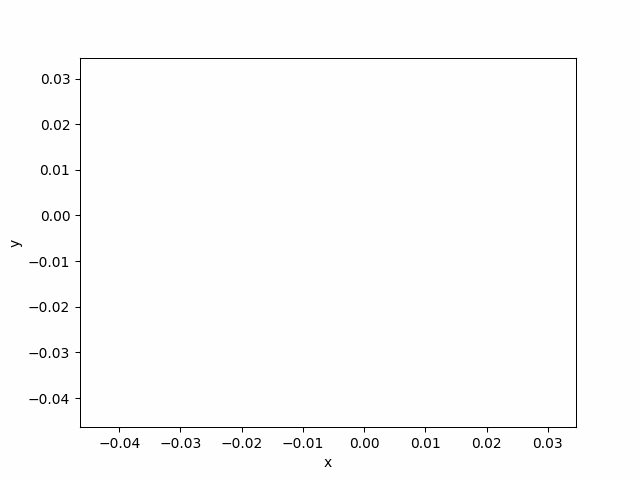

In [102]:
vis.clear()
intersections, vis = find_intersections_with_visualization(sections_five)
vis.show_gif(interval=200)

[((np.float64(10.161290322580644), np.float64(86.36363636363637)), (np.float64(92.74193548387098), np.float64(9.95670995670996))), ((np.float64(14.516129032258064), np.float64(14.718614718614722)), (np.float64(93.38709677419355), np.float64(93.72294372294373))), ((np.float64(21.774193548387093), np.float64(48.484848484848484)), (np.float64(35.64516129032258), np.float64(50.649350649350644))), ((np.float64(60.322580645161295), np.float64(11.255411255411259)), (np.float64(67.25806451612904), np.float64(89.17748917748918))), ((np.float64(71.12903225806451), np.float64(11.471861471861475)), (np.float64(79.6774193548387), np.float64(88.96103896103897))), ((np.float64(79.51612903225806), np.float64(48.484848484848484)), (np.float64(85.3225806451613), np.float64(50.43290043290043)))]


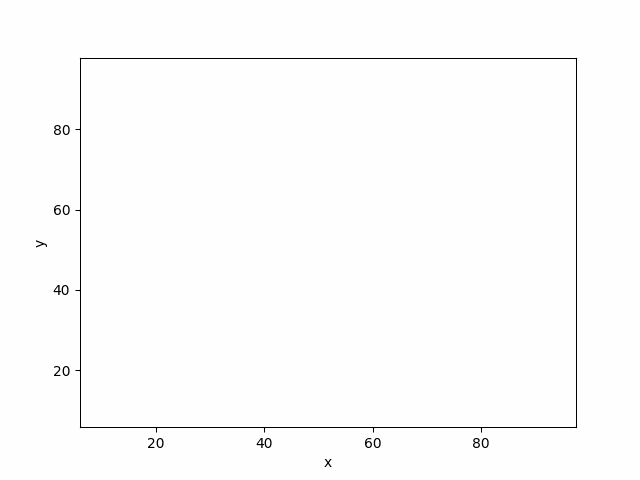

In [115]:
vis.clear()
print(lines)
intersections_res,vis=find_intersections_with_visualization(lines)
vis.show_gif(interval=200)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Konieczne było dodanie klasy, w celu dodawania odcinków, w odpowniedniej kolejności, do struktur. Próbując zrobić to bez klasy, natrafiłem na problem z kluczem, po którym odbywa się dodawanie do sorted seta, gdyż nie mógł on być dynamiczny. W przypadku algorytmu do sprawdzania, czy istnieje jakiekolwiek przecięcie, nie było tej potrzeby, gdyż po natrafieniu na przecięcie, algorytm kończył swoje działanie. 

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Algorytm obsługuje 3 zdarzenia:
1. Start - początek odcinka, sprawdza czy nie następuje przecięcie, z siąsiednimi odcinkami
2. End - koniec odcinka, usuwa odcinek ze struktury stanu i sprawdza, czy sąsiedzi usuniętego odcinka, przecinają się
3. Cross - przecięcie 2 odcinków, w tym punkcie zmienia się kolejność przecinających się odcinków, w strukturze stanu, następnie sprawdzani są nowi sąsiedzi, pod kątem przecięć

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

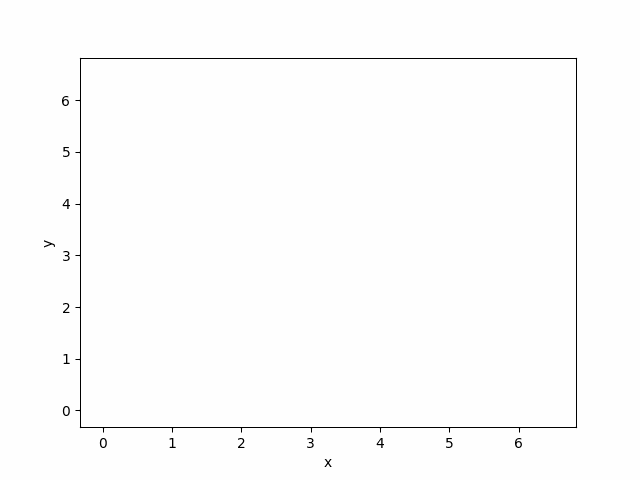

In [103]:
vis.clear()
testing_sections=[((1,5),(6,1)),((0,0),(6.5,3)),((1.3,2.6),(2,3.5)),((3,2.2),(4,2))]
intersections_res,vis=find_intersections_with_visualization(testing_sections)
vis.show_gif(interval=200)

### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Mój program uwzględnia taki przypadek, ponieważ korzysta ze struktury set. W zbiorze zapisywane są punkty przecięcia, które już zostały przetworzone, dzięki temu taki przypadek, jest poprawnie obsługiwany.